This notebook is intended to provide basic EDA...

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pandas as pd
import numpy as np
import os

In [3]:
TRAIN_PATH = "Data/train.csv"
TEST_PATH = "Data/test.csv"

# Load the data into the environment
def read_data(TRAIN_PATH, TEST_PATH):      
    train_data = pd.read_csv(TRAIN_PATH)
    test_data = pd.read_csv(TEST_PATH)
    return train_data, test_data

# Describe the dataset, I included all the types 
def description(dataframe):
    return dataframe.describe(include=["object", "int64", "float64"])

train_data, test_data = read_data(TRAIN_PATH, TEST_PATH)
description(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# Separate the dataset into Features and Labels
def set_target_variable(dataframe, target):
    X = dataframe.drop(columns=[target])
    y = dataframe[target]
    return X, y

# Describe the target variable
def describe_categorical_target(target):
    classes = dataframe[target].values
    unique, counts = np.unique(classes, return_counts=True)
    plt.bar(unique, counts)
    plt.show()
    print(dataframe[target].info)

def describe_numerical_target(dataframe, target):
    sns.distplot(dataframe[target])

#correlation matrix
def correlation_matrix(dataframe):
    corr = dataframe.corr()
    plt.subplots(figsize=(15,12))
    return sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)
    



In [12]:
X, y = set_target_variable(train_data, "SalePrice")

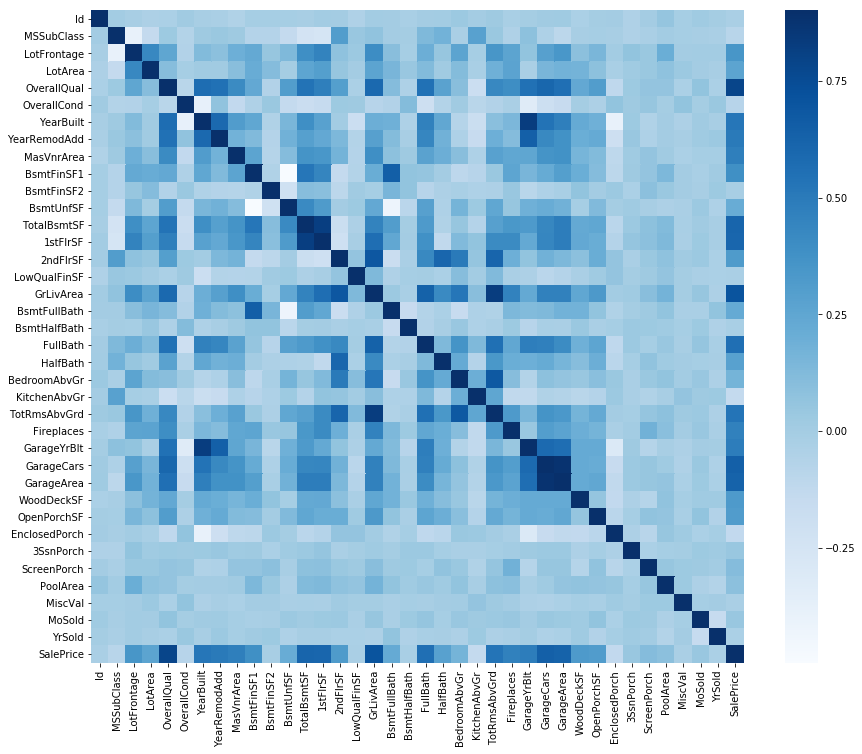

In [17]:
correlation_matrix(train_data)

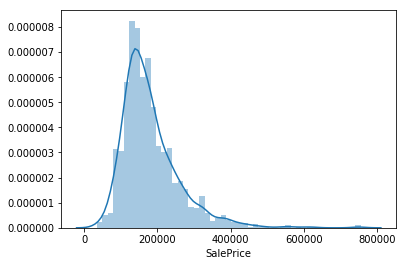

In [23]:
describe_numerical_target(train_data, "SalePrice")

In [22]:
#describe the target variable
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

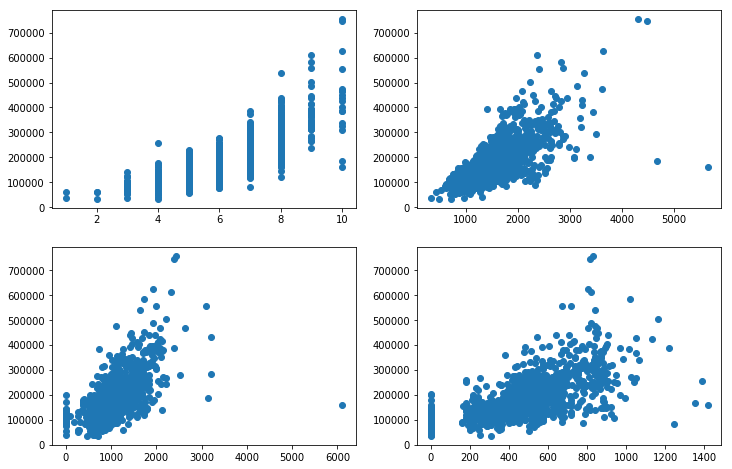

In [45]:
# Depending on the correlation matrix show the scatter plots to describe their relationship
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
ax[0][0].scatter(train_data["OverallQual"], train_data["SalePrice"])
ax[0][1].scatter(train_data["GrLivArea"], train_data["SalePrice"])
ax[1][0].scatter(train_data["TotalBsmtSF"], train_data["SalePrice"])
ax[1][1].scatter(train_data["GarageArea"], train_data["SalePrice"])

## Thoughts about the data and conclusions

It seems like the target variable is skewed. Some of the high-correlating variables have the outliers that need to be taken care of. 

In [12]:
import sqlalchemy